In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("C:/Users/aiger/Desktop/MSFE/IE517/HW5/hw5_treasury yield curve data.csv")

In [6]:
df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


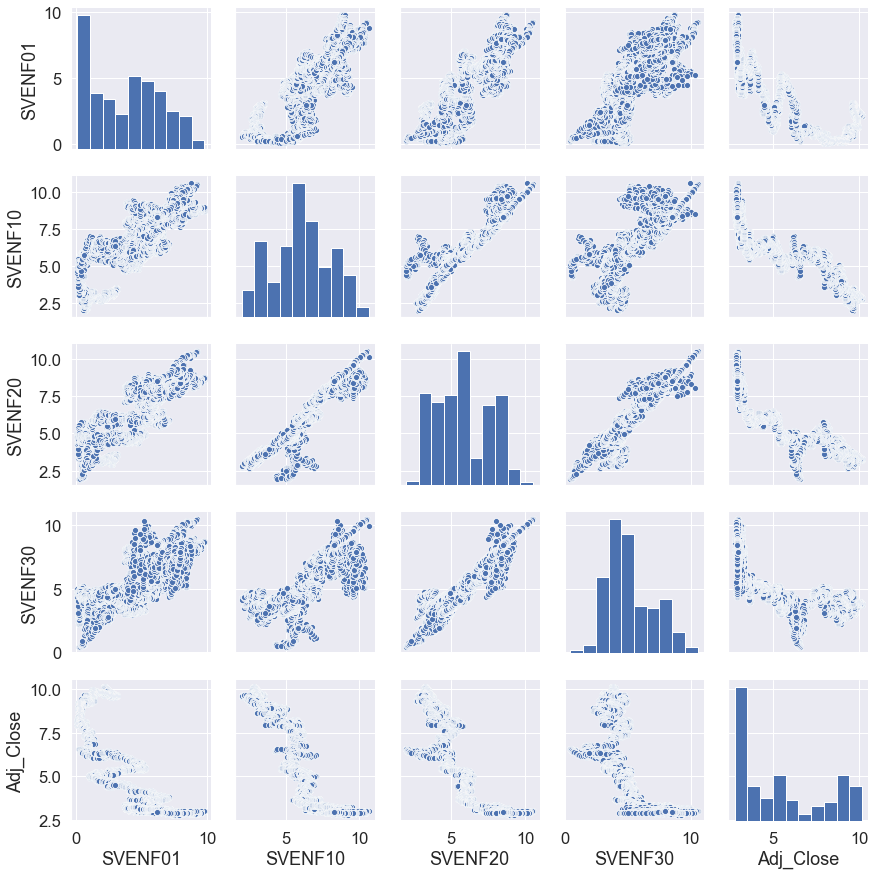

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =['SVENF01', 'SVENF10','SVENF20', 'SVENF30', 'Adj_Close']
sns.pairplot(df[cols], height = 2.5)
plt.tight_layout()
plt.show()

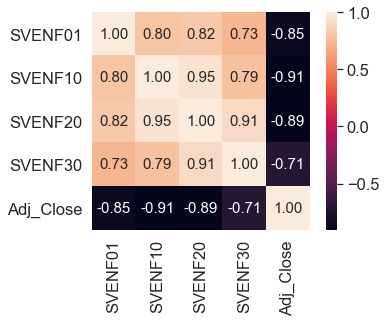

In [89]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X,y=df.iloc[:, 0:30],df[['Adj_Close']]
X_std=sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state=42)
X_train_std= stad.fit_transform(X_train)
X_test_std= stad.fit_transform(X_test)


In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([9.31796975e-01, 4.07650756e-02, 2.18438668e-02, 4.85133058e-03,
       6.63341250e-04, 6.87379176e-05, 9.48168675e-06, 1.09876995e-06,
       8.50910960e-08, 6.74428451e-09, 4.72621857e-10, 3.80161775e-11,
       9.30609065e-12, 8.71811396e-12, 8.59362280e-12, 8.53519254e-12,
       8.41818231e-12, 8.32407041e-12, 8.16475927e-12, 8.12446450e-12,
       7.94366171e-12, 7.84486451e-12, 7.70300119e-12, 7.56475430e-12,
       7.49445649e-12, 7.39336209e-12, 7.21415235e-12, 6.93802195e-12,
       6.58019099e-12, 6.26023985e-12])

No handles with labels found to put in legend.


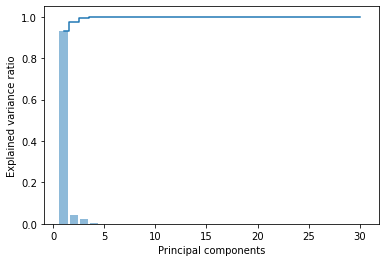

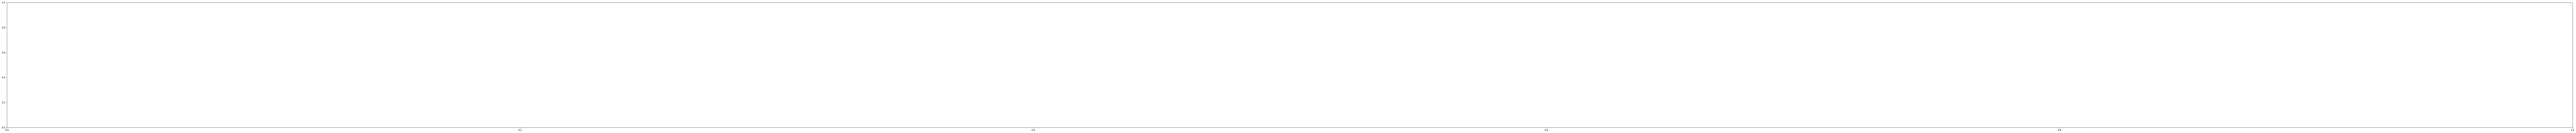

In [43]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.5, align='center',label= 'cumulative explained variance')
plt.step(range(1, 31), np.cumsum(pca.explained_variance_ratio_), where='mid',label= 'cumulative varianceratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.figure(figsize=(200,10))
plt.legend(loc='best')
plt.show()

In [19]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in 
        sorted(eigen_vals, reverse=True)]

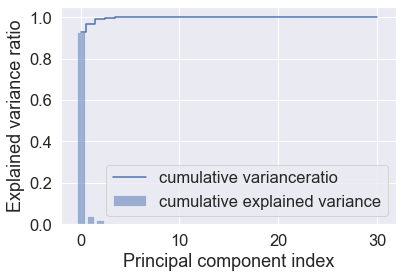

<Figure size 14400x720 with 0 Axes>

In [40]:
cum_var_exp=np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(0, 31, 1), var_exp, alpha=0.5, align= 'center', label= 'cumulative explained variance')
plt.step(range(0, 31, 1), cum_var_exp, where ='mid', label= 'cumulative varianceratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

plt.figure(figsize=(200,10))

plt.show()

In [59]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([9.31796975e-01, 4.07650756e-02, 2.18438668e-02, 4.85133058e-03,
       6.63341250e-04, 6.87379176e-05, 9.48168675e-06, 1.09876995e-06,
       8.50910960e-08, 6.74428451e-09, 4.72621857e-10, 3.80161775e-11,
       9.30609065e-12, 8.71811396e-12, 8.59362280e-12, 8.53519254e-12,
       8.41818231e-12, 8.32407041e-12, 8.16475927e-12, 8.12446450e-12,
       7.94366171e-12, 7.84486451e-12, 7.70300119e-12, 7.56475430e-12,
       7.49445649e-12, 7.39336209e-12, 7.21415235e-12, 6.93802195e-12,
       6.58019099e-12, 6.26023985e-12])

In [60]:
#taking only the top 3 components and running PCA again
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pcomp = pca.explained_variance_ratio_
pca.components_
print(pcomp)

[0.93179697 0.04076508 0.02184387]


In [61]:
X_pca=pca.transform(X)

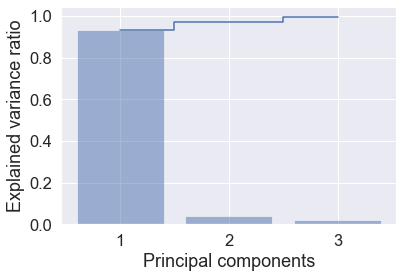

In [62]:
plt.bar( range(1, len(pcomp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pcomp)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### Part 3: Linear regression v. SVM regressor - baseline

In [63]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train_std, y_train)
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904


In [87]:
from sklearn.linear_model import LinearRegression

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LinearRegression()
lr = lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.820, test: 0.854
R^2 train: 0.867, test: 0.866


In [84]:
from sklearn import svm
import time
regr = svm.SVR()
regr.fit(X_train_std, y_train)
y_train_pred = regr.predict(X_train_std)
y_test_pred = regr.predict(X_test_std)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\aiger\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE train: 0.070, test: 0.069
R^2 train: 0.989, test: 0.989


In [85]:
from sklearn import svm
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
regr = svm.SVR()
regr.fit(X_train_pca, y_train)
y_train_pred = regr.predict(X_train_pca)
y_test_pred = regr.predict(X_test_pca)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\aiger\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE train: 0.136, test: 0.143
R^2 train: 0.978, test: 0.978


In [90]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Aigerim
My NetID is: aigerim4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
